In [15]:
import mne
import numpy
import matplotlib.pyplot as plt

def plot_eeg(data: mne.io.Raw, resolution: float = 1) -> plt.Figure:
    events = mne.make_fixed_length_events(data, duration = resolution)
    draw_epochs = mne.Epochs(data, events, baseline = None, tmin = 0, tmax = resolution, preload = True, verbose = False)
    data = numpy.average(draw_epochs.get_data(copy = True), axis = 2)
    data = data[:, data.mean(axis = 0).argsort()[::-1]] # Sort for better picture
    min, max = numpy.min(data), numpy.max(data)

    fig, ax = plt.subplots(1, 1, figsize = (12.5, 4))
    ax.xaxis.set_visible(False)
    ax.set_ylim(min - 3e-6, max)

    x = draw_epochs.events[:, 0] / draw_epochs.info['sfreq']
    ax.set_xlim(x[0], x[-1])
    for i in range(0, data.shape[1]): ax.plot(x, data[:, i])

    return fig

In [17]:
data = mne.io.read_raw_fif(f"../Subj1/src/data_rr_filt-raw.fif")
plot_eeg(data).savefig(f"presentation/eeg.svg")

Opening raw data file ../Subj1/src/data_rr_filt-raw.fif...
    Range : 3500 ... 471000 =      7.000 ...   942.000 secs
Ready.


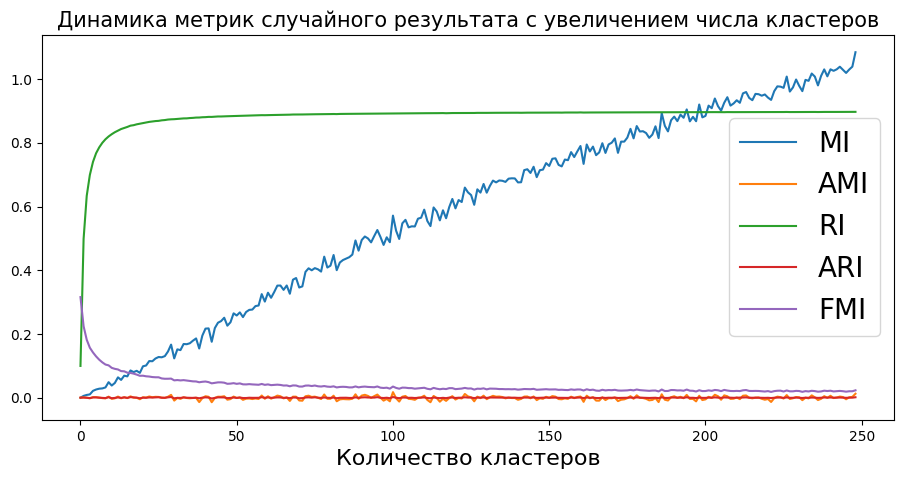

In [13]:
import numpy
import sklearn.metrics
import matplotlib.pyplot as plt

AMI, MI, ARI, RI, FMI = [ ], [ ], [ ], [ ], [ ]

true = numpy.random.randint(0, 10, size = (1000))
for num_clusters in range(1, 250):
    pred = numpy.random.randint(0, num_clusters, size = (1000))
    MI.append(sklearn.metrics.mutual_info_score(true, pred))
    AMI.append(sklearn.metrics.adjusted_mutual_info_score(true, pred))
    RI.append(sklearn.metrics.rand_score(true, pred))
    ARI.append(sklearn.metrics.adjusted_rand_score(true, pred))
    FMI.append(sklearn.metrics.fowlkes_mallows_score(true, pred))

fig, ax = plt.subplots(1, 1, figsize = (11, 5))
ax.plot(MI, label = 'MI')
ax.plot(AMI, label = 'AMI')
ax.plot(RI, label = 'RI')
ax.plot(ARI, label = 'ARI')
ax.plot(FMI, label = 'FMI')
ax.legend(fontsize = 20)
ax.set_title('Динамика метрик случайного результата с увеличением числа кластеров', fontsize = 15)
ax.set_xlabel('Количество кластеров', fontsize = 16)
fig.savefig(f"presentation/outer_metrics.svg")
fig.savefig(f"presentation/outer_metrics.png")